In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage, misc
from scipy.linalg import toeplitz
np.set_printoptions(threshold=np.inf)
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [3]:
t0 = -5
tn = 99.5
ts = 12.0
n  = int(2*(tn-t0)+1)
t  = np.linspace(-5,99.5,n)
dt = 0.5


0.22652348570492042


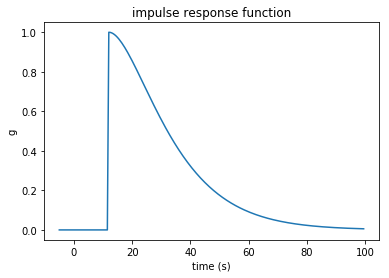

In [4]:
idx = int(np.argwhere(t==ts))

g0 = np.exp(1)/ts
print(g0)
g = np.zeros(n)
for i in range(n):
    if i >= idx:
        ti = t[i]
        g[i] = g0*ti*np.exp(-ti/ts)
                
ax=plt.subplot(111)
plt.tick_params(axis="True", which="both", bottom="True", top="False", 
               labelbottom="True", left="True", right="False", labelleft="True")
plt.plot(t,g)
ax.set_xlabel("time (s)")
ax.set_ylabel("g")
plt.title('impulse response function')
plt.show()

In [24]:
G = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        if (i >= j):
            G[i,j] = g0*(t[i]-t[j])*np.exp(-(t[i]-t[j])/ts)*dt

[u, s, v] = np.linalg.svd(G)
v=v.T

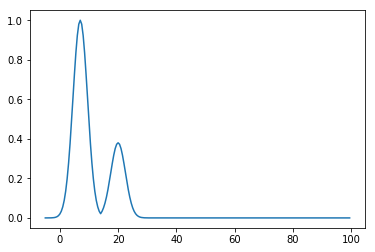

In [25]:
mt1 = norm.pdf(t, 7, 2.5)
mt1 = mt1/max(mt1)
mt1 = mt1[0:38]
mt2 = norm.pdf(t, 20, 2.5)
mt2 = (mt2/max(mt2))*.38
mt2 = mt2[38:]
mt  = np.concatenate([mt1, mt2]) 

ax=plt.subplot(111)
plt.plot(t,mt)
plt.show()

Text(0.5,1,'impulse response function')

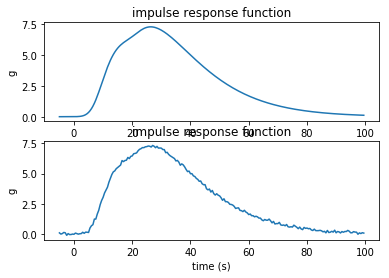

In [40]:
# data without noise
d1   = np.dot(G,mt)

# Input noisy data 
np.random.seed(0)
dmax = max(d1)*0.01
d    = d1+np.random.normal(0.0,dmax,n)

ax=plt.subplot(211)
plt.plot(t,d1)
ax.set_xlabel("time (s)")
ax.set_ylabel("g")
plt.title('impulse response function')
#plt.show()

ax=plt.subplot(212)
plt.plot(t,d)
ax.set_xlabel("time (s)")
ax.set_ylabel("g")
plt.title('impulse response function')
#plt.show()

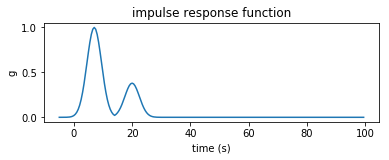

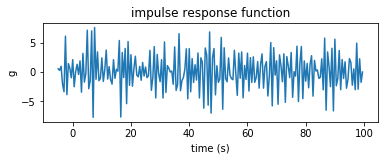

In [41]:
p = np.linalg.matrix_rank(G)
up = u[:, 0:p]
vp = v[:, 0:p]
sp = s[0:p]

sm = np.eye(p,p)
for i in range(p):
    sm[i,i] = sp[i]
smi = np.linalg.inv(sm)

Gt        = np.dot(np.dot(vp,smi), up.T)
mest_nf   = np.dot(Gt, d1)
mest_n    = np.dot(Gt, d)

ax=plt.subplot(211)
plt.plot(t,mest_nf)
ax.set_xlabel("time (s)")
ax.set_ylabel("g")
plt.title('impulse response function')
plt.show()

ax=plt.subplot(212)
plt.plot(t,mest_n)
ax.set_xlabel("time (s)")
ax.set_ylabel("g")
plt.title('impulse response function')
plt.show()